In [1]:
# IMPORT LIBRARY
# =======================
# Data & Visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluasi
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve, auc
)

In [3]:
# lOAD DATASET
# ==================
# Baca dataset
df = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)

# Info dasar
print("Shape of dataset:", df.shape)
display(df.head())
display(df.info())
display(df.describe())

# Distribusi loan_status
print(df['loan_status'].value_counts())

Shape of dataset: (466285, 75)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

None

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64


In [7]:
# BUAT KOLOM TARGET
#======================
def label_risk(status):
    if status in ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off']:
        return 'BAD'
    elif status in ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']:
        return 'GOOD'
    else:
        return 'UNKNOWN'

df['credit_risk'] = df['loan_status'].apply(label_risk)

# Ambil data dengan label GOOD/BAD saja
df_eda = df[df['credit_risk'].isin(['GOOD', 'BAD'])].copy()

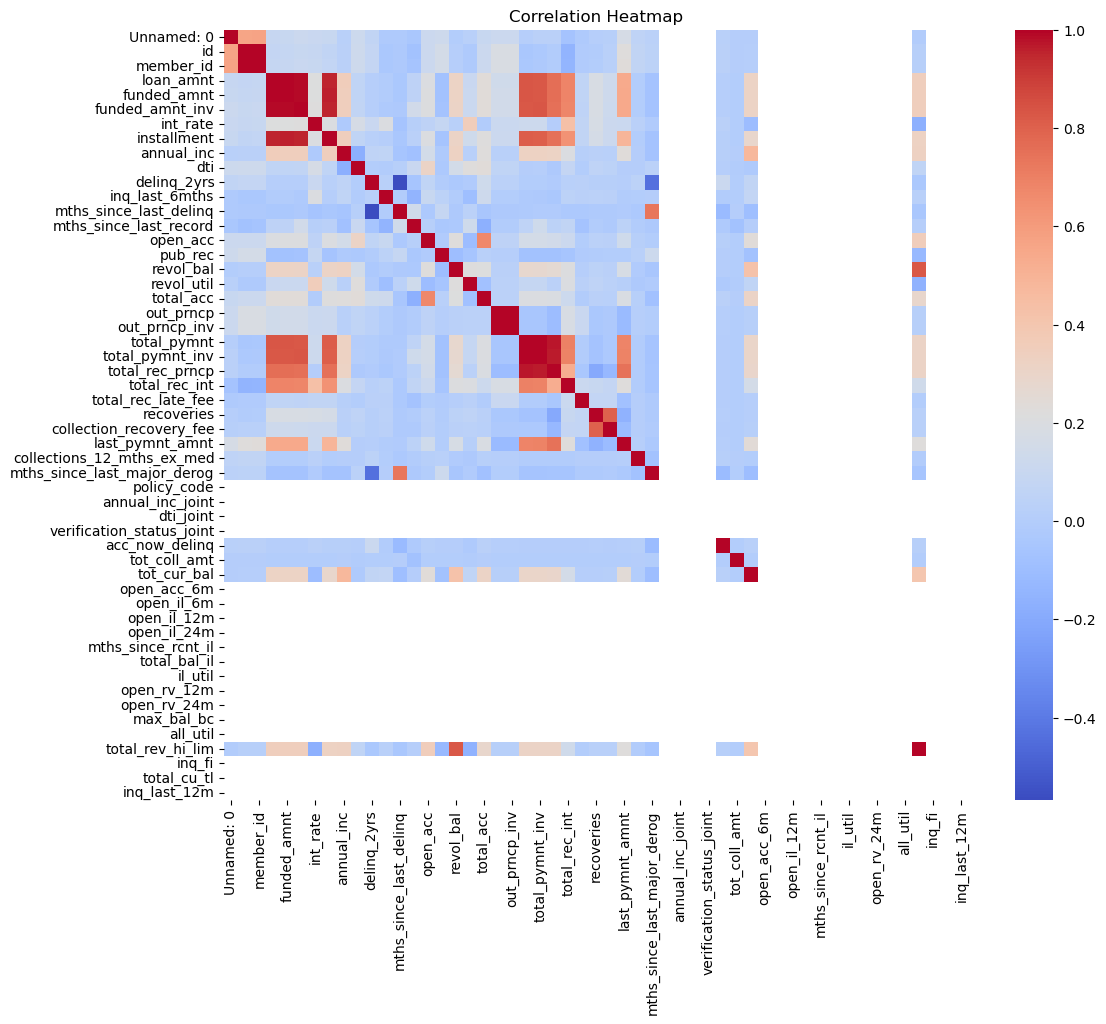

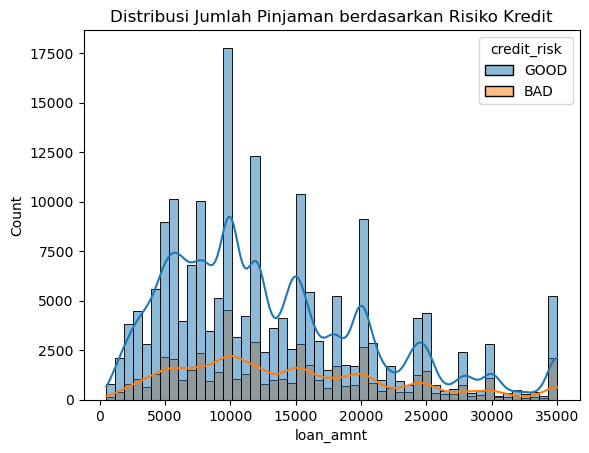

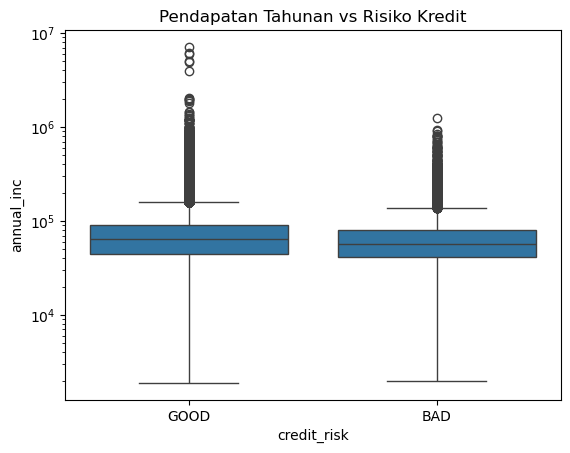

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11564\2454829999.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, x='credit_risk', palette='Set2')


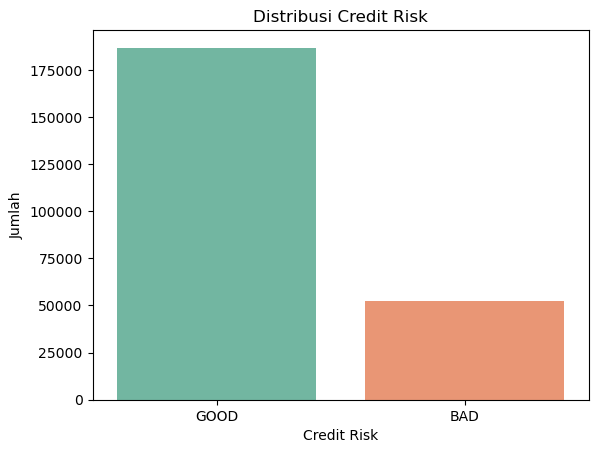

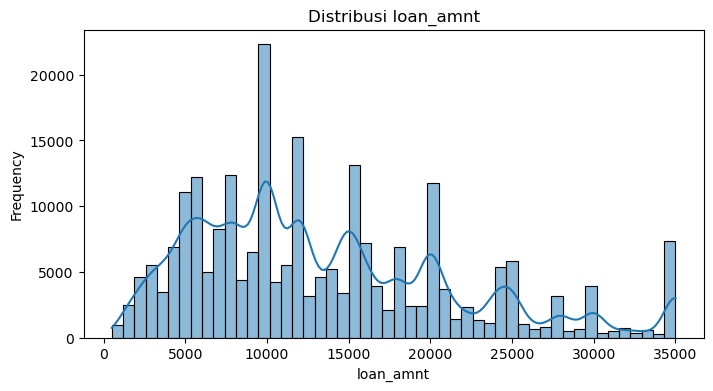

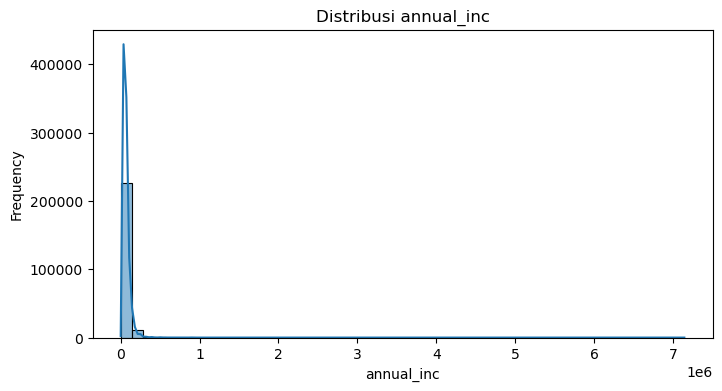

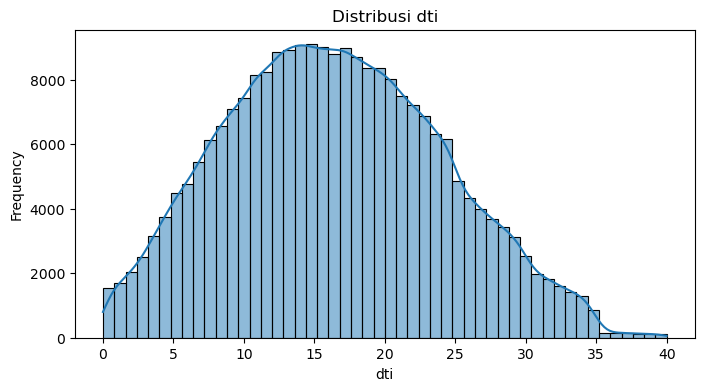

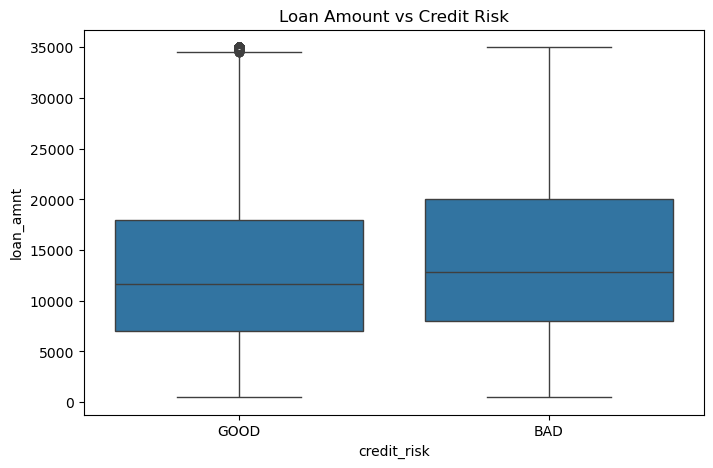

In [9]:
#  Exploratory Data Analysis (EDA)
# ========================================

# Korelasi
numeric_cols = df_eda.select_dtypes(include='number').columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_eda[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Univariat & Bivariat
# Distribusi loan amount
sns.histplot(data=df_eda, x='loan_amnt', hue='credit_risk', bins=50, kde=True)
plt.title('Distribusi Jumlah Pinjaman berdasarkan Risiko Kredit')
plt.show()

# Pendapatan vs risiko
sns.boxplot(x='credit_risk', y='annual_inc', data=df_eda)
plt.title('Pendapatan Tahunan vs Risiko Kredit')
plt.yscale('log')
plt.show()

# Distribusi label
sns.countplot(data=df_eda, x='credit_risk', palette='Set2')
plt.title('Distribusi Credit Risk')
plt.xlabel('Credit Risk')
plt.ylabel('Jumlah')
plt.show()


# Distribusi & Boxplot Beberapa Fituy
# Distribusi fitur penting
for col in ['loan_amnt', 'annual_inc', 'dti']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_eda[col], bins=50, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Loan amount vs credit risk
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_eda, x='credit_risk', y='loan_amnt')
plt.title('Loan Amount vs Credit Risk')
plt.show()

In [13]:
# DATA PREPARATION
# ===================
# Buat salinan untuk encoding
df_encoded = df.copy()

# Simpan target dan hapus kolom aslinya
df_encoded['credit_risk_target'] = df_encoded['credit_risk'].map({'GOOD': 0, 'BAD': 1})
df_encoded.drop(columns=['loan_status', 'credit_risk'], inplace=True)

# Pisahkan kolom object ke low/high cardinality
low_card_cols = [col for col in df_encoded.select_dtypes(include='object').columns if df_encoded[col].nunique() < 50]
high_card_cols = [col for col in df_encoded.select_dtypes(include='object').columns if df_encoded[col].nunique() >= 50]

# ✅ Tambahkan baris ini sebelum loop encoding
le = LabelEncoder()

# Label encode high cardinality
for col in high_card_cols:
    df_encoded[col] = df_encoded[col].fillna('Unknown')
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# One-hot encode low cardinality
df_encoded = pd.get_dummies(df_encoded, columns=low_card_cols, drop_first=True)

# Cek dulu apakah masih ada NaN
print("Total NaN setelah encoding:", df_encoded.isna().sum().sum())
print("Top 5 rows with NaNs:")
print(df_encoded[df_encoded.isna().any(axis=1)].head())

print("Kolom dengan NaN:")
print(df_encoded.isna().sum()[df_encoded.isna().sum() > 0].sort_values(ascending=False))
df_encoded = df_encoded.fillna(0)

# Assert pastikan tidak ada NaN
assert df_encoded.isna().sum().sum() == 0, "Masih ada NaN setelah preprocessing!"

# === SCALING ===
feature_cols = df_encoded.drop(columns=['credit_risk_target']).select_dtypes(include='number').columns
scaler = StandardScaler()
df_encoded[feature_cols] = scaler.fit_transform(df_encoded[feature_cols])

Total NaN setelah encoding: 9387017
Top 5 rows with NaNs:
   Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

   int_rate  installment  emp_title  annual_inc  ...  purpose_house  \
0     10.65       162.87     166178     24000.0  ...          False   
1     15.27        59.83     131796     30000.0  ...          False   
2     15.96        84.33     166178     12252.0  ...          False   
3     13.49       339.31       2257     49200.0  ...          False   
4     12.69        67.79     165724     80000.0  ...          False   

   purpose_major_purchase  purpose_medical  pu

In [17]:
# === SPLIT DATA ===
X = df_encoded.drop(columns=['credit_risk_target'])
y = df_encoded['credit_risk_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     82820
         1.0       0.99      0.89      0.94     10437

    accuracy                           0.99     93257
   macro avg       0.99      0.95      0.97     93257
weighted avg       0.99      0.99      0.99     93257

Confusion Matrix:
 [[82745    75]
 [ 1106  9331]]
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     82820
         1.0       1.00      0.93      0.97     10437

    accuracy                           0.99     93257
   macro avg       1.00      0.97      0.98     93257
weighted avg       0.99      0.99      0.99     93257

Confusion Matrix:
 [[82820     0]
 [  699  9738]]
Random Forest 5-Fold CV ROC AUC Scores: [0.9860799  0.96627097 0.70516983 0.89909566 0.9829912 ]
Average CV AUC: 0.9079215130783563
Fitting 3 folds for each of 24 can

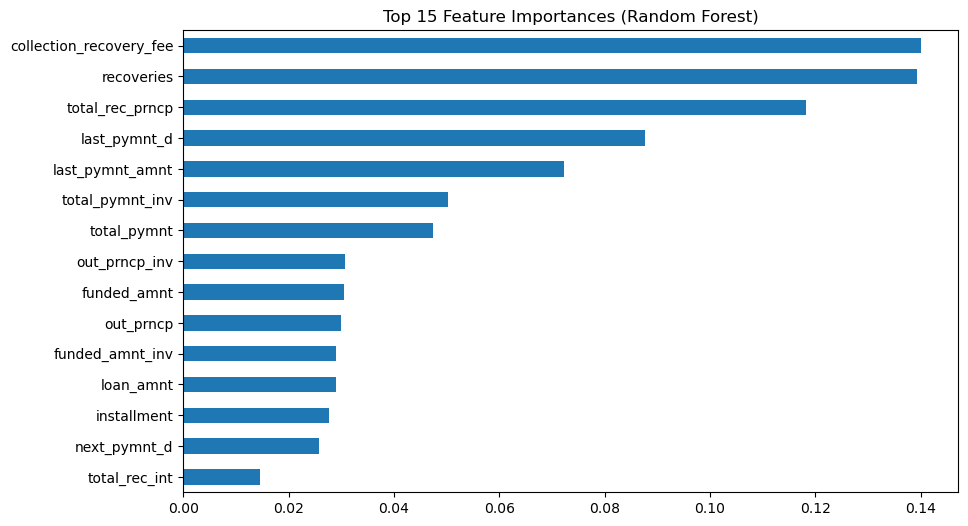

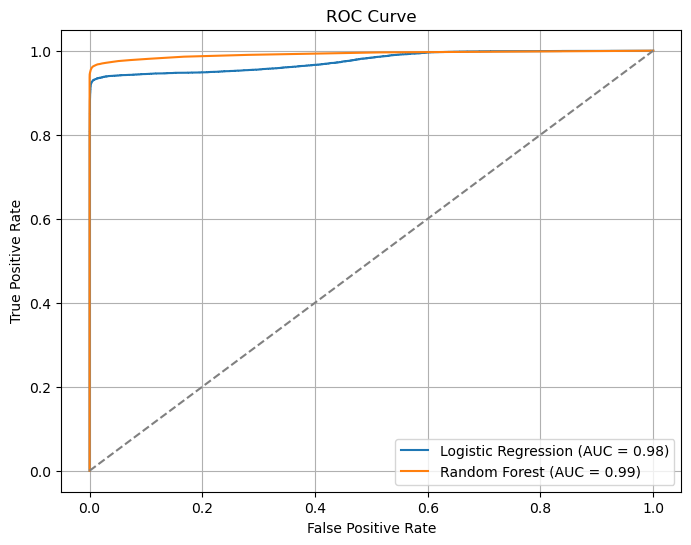

In [19]:
# MODELING & EVALUATION

# ======================
# Logistic Regression
# ======================
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

# ROC-AUC
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]
roc_auc_logreg = roc_auc_score(y_test, y_proba_logreg)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)

# ======================
# Random Forest Classifier
# ======================
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# ROC-AUC
y_proba_rf = rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# ======================
# Cross Validation
# ======================
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')
print("Random Forest 5-Fold CV ROC AUC Scores:", cv_scores)
print("Average CV AUC:", cv_scores.mean())

# ======================
# Hyperparameter Tuning (GridSearchCV)
# ======================
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)

# ======================
# Feature Importance
# ======================
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
importances.nlargest(15).plot(kind='barh', figsize=(10, 6))
plt.title('Top 15 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

# ======================
# ROC Curve Plot
# ======================
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# === IMPORT LIBRARIES ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve, auc
)
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings('ignore')

# === LOAD DATA ===
df = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)

# === DATA UNDERSTANDING ===
print("Dataset Shape:", df.shape)
print("\nJumlah nilai unik per kolom:")
print(df.nunique().sort_values(ascending=False).head(10))

print("\nMissing Values Overview:")
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title("Visualisasi Missing Values")
plt.show()

print(df.info())  # Struktur dataset

# === TARGET LABELING ===
def label_risk(status):
    if status in ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off']:
        return 'BAD'
    elif status in ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']:
        return 'GOOD'
    else:
        return 'UNKNOWN'

df['credit_risk'] = df['loan_status'].apply(label_risk)
df = df[df['credit_risk'].isin(['GOOD', 'BAD'])].copy()

# === HANDLE MISSING VALUES ===
numeric_cols = df.select_dtypes(include='number').columns
object_cols = df.select_dtypes(include='object').columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[object_cols] = df[object_cols].fillna(df[object_cols].mode().iloc[0])

# === FEATURE ENGINEERING ===
print("\nFeature Engineering - Label Encoding & One-Hot Encoding...")

df_encoded = df.copy()
df_encoded['credit_risk_target'] = df_encoded['credit_risk'].map({'GOOD': 0, 'BAD': 1})
df_encoded.drop(columns=['loan_status', 'credit_risk'], inplace=True)

low_card_cols = [col for col in df_encoded.select_dtypes(include='object').columns if df_encoded[col].nunique() < 50]
high_card_cols = [col for col in df_encoded.select_dtypes(include='object').columns if df_encoded[col].nunique() >= 50]

le = LabelEncoder()

for col in high_card_cols:
    df_encoded[col] = df_encoded[col].fillna('Unknown')
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

df_encoded = pd.get_dummies(df_encoded, columns=low_card_cols, drop_first=True)

df_encoded = df_encoded.fillna(0)

# === EDA / VISUALIZATION ===
print("\nExploratory Data Analysis...")

# Korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribusi Jumlah Pinjaman
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='loan_amnt', hue='credit_risk', bins=40, kde=True)
plt.title('Distribusi Jumlah Pinjaman berdasarkan Risiko Kredit')
plt.xlabel('loan_amnt')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Boxplot Pendapatan Tahunan
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='credit_risk', y='annual_inc')
plt.title('Pendapatan Tahunan vs Risiko Kredit')
plt.yscale('log')  # karena annual_inc skewed
plt.grid(True)
plt.show()

# === SCALING ===
feature_cols = df_encoded.drop(columns=['credit_risk_target']).select_dtypes(include='number').columns
scaler = StandardScaler()
df_encoded[feature_cols] = scaler.fit_transform(df_encoded[feature_cols])

# === SPLIT DATA ===
X = df_encoded.drop(columns=['credit_risk_target'])
y = df_encoded['credit_risk_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# === MODELING ===
models = {
    'Logistic Regression': LogisticRegression(penalty='l2', solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# === FEATURE IMPORTANCE (Random Forest) ===
rf = models['Random Forest']
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8, 6))
plt.title('Top 10 Feature Importances (Random Forest)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Importance')
plt.tight_layout()
plt.show()